<a href="https://colab.research.google.com/github/raj-vijay/dl/blob/master/11_Training_a_network_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Random initializers**

Often need to initialize thousands of variables
- tf.ones() may perform poorly
- Tedious and difficult to initialize variables individually

Alternatively, draw initial values from distribution
- Normal
- Uniform
- Glorot initializer

**Initializing variables in TensorFlow**

In [0]:
import tensorflow as tf
import numpy as np
# Define 500x500 random normal variable
weights = tf.Variable(tf.random.normal([500, 500]))
# Define 500x500 truncated random normal variable
weights = tf.Variable(tf.random.truncated_normal([500, 500]))

In [0]:
# Define a dense layer with the default initializer
dense = tf.keras.layers.Dense(32, activation='relu')
# Define a dense layer with the zeros initializer
dense = tf.keras.layers.Dense(32, activation='relu',\
kernel_initializer='zeros')

**Neural networks and overfitting**

**Default of Credit Card Clients Dataset**

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. 

From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. 

Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. 

Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.



Installing Kaggle Package to access the diabetes dataset from Kaggle.

In [0]:
!pip install kaggle

Make .kaggle directory under root to import the Kaggle Authentication JSON.

In [0]:
!mkdir ~/.kaggle

Change file path to root/.kaggle/kaggle.json

In [0]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

Chmod 600 (chmod a+rwx,u-x,g-rwx,o-rwx) sets permissions so that, (U)ser / owner can read, can write and can't execute. (G)roup can't read, can't write and can't execute. (O)thers can't read, can't write and can't execute.

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

Download housing dataset from Kaggle!

In [0]:
!kaggle datasets download -d uciml/default-of-credit-card-clients-dataset

  0% 0.00/0.98M [00:00<?, ?B/s]
100% 0.98M/0.98M [00:00<00:00, 65.0MB/s]


In [0]:
import pandas as pd
file = '/content/default-of-credit-card-clients-dataset.zip'
data = pd.read_csv(file, compression = 'zip')

In [0]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


The input layer contains 3 features: 
1. Education
2. Marital status, and
3. Age

which are available as borrower_features. 

The hidden layer contains 2 nodes and the output layer contains a single node.

In [0]:
borrower_features = data.drop(['ID','default.payment.next.month'], 1)

In [0]:
borrower_features.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


For each layer, we take the previous layer as an input, initialize a set of weights, compute the product of the inputs and weights, and then apply an activation function. 

In [0]:
default = data['default.payment.next.month']

In [0]:
default.head()

0    1
1    1
2    0
3    0
4    0
Name: default.payment.next.month, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
borrower_features, test_features, default, test_targets = train_test_split(borrower_features, default, test_size = 0.1, random_state = 42)

In [0]:
default.astype(float)
test_targets.astype(float)

2308     0.0
22404    0.0
23397    0.0
25058    0.0
2664     1.0
        ... 
21481    0.0
26178    0.0
27445    0.0
1723     0.0
8485     0.0
Name: default.payment.next.month, Length: 3000, dtype: float64

In [0]:
import tensorflow as tf

In [0]:
borrower_features = tf.constant(borrower_features, tf.float32)
default = tf.constant(default, dtype = tf.float32, shape = [default.shape[0], 1])
test_features = tf.constant(test_features, tf.float32)
test_targets = tf.constant(test_targets, dtype = tf.float32, shape = [test_targets.shape[0], 1])

In [0]:
print(test_features.shape) # (500, 23)
print(test_targets.shape) # (500, 1)
print(borrower_features.shape) # (29500, 23)
print(default.shape) # (29500, 1)

(3000, 23)
(3000, 1)
(27000, 23)
(27000, 1)


**Function to Obtain Confusion Matrix**

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def confusion_matrix(default, model_predictions):
	df = pd.DataFrame(np.hstack([default, model_predictions.numpy() > 0.5]), columns = ['Actual','Predicted'])
	confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])
	sns.heatmap(confusion_matrix, cmap="Greys", fmt="d", annot=True, cbar=False)
	plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Function to Optimize Gradient Descent**

In [0]:
def minimize(self, loss, var_list, grad_loss=None, name=None):
    """Minimize `loss` by updating `var_list`.

    This method simply computes gradient using `tf.GradientTape` and calls
    `apply_gradients()`. If you want to process the gradient before applying
    then call `tf.GradientTape` and `apply_gradients()` explicitly instead
    of using this function.

    Args:
      loss: A callable taking no arguments which returns the value to minimize.
      var_list: list or tuple of `Variable` objects to update to minimize
        `loss`, or a callable returning the list or tuple of `Variable` objects.
        Use callable when the variable list would otherwise be incomplete before
        `minimize` since the variables are created at the first time `loss` is
        called.
      grad_loss: Optional. A `Tensor` holding the gradient computed for `loss`.
      name: Optional name for the returned operation.

    Returns:
      An `Operation` that updates the variables in `var_list`. The `iterations`
      will be automatically increased by 1.

    Raises:
      ValueError: If some of the variables are not `Variable` objects.

    """
    grads_and_vars = self._compute_gradients(
        loss, var_list=var_list, grad_loss=grad_loss)

    return self.apply_gradients(grads_and_vars, name=name)

**Initialization in TensorFlow**

In [0]:
def weight_variable(shape):
    shape = tf.TensorShape(shape)
    initial_values = tf.truncated_normal(shape, stddev=0.1)
    
    return tf.Variable(initial_values)
def bias_variable(shape):
    initial_values = tf.zeros(tf.TensorShape(shape))
    
    return tf.Variable(initial_values)

In [0]:
# Define the layer 1 weights
w1 = tf.Variable(tf.random.normal([23, 7]))

# Initialize the layer 1 bias
b1 = tf.Variable(tf.ones([7]))

# Define the layer 2 weights
w2 = tf.Variable(tf.random.normal([7,1]))

# Define the layer 2 bias
b2 = tf.Variable([0.0])

**Defining the model and loss function**

Here, we train a neural network to predict whether a credit card holder will default or not.

The predictions layer is defined as σ(layer1∗w2+b2), where σ is the sigmoid activation, layer1 is a tensor of nodes for the first hidden dense layer, w2 is a tensor of weights, and b2 is the bias tensor.

In [0]:
# Define the model
def model(w1, b1, w2, b2, features = borrower_features):
	# Apply relu activation functions to layer 1
	layer1 = tf.keras.activations.relu(tf.matmul(features, w1) + b1)
    # Apply dropout
	dropout = tf.keras.layers.Dropout(0.25)(layer1)
	return tf.keras.activations.sigmoid(tf.matmul(dropout, w2) + b2)

# Define the loss function
def loss_function(w1, b1, w2, b2, features = borrower_features, targets = default):
	predictions = model(w1, b1, w2, b2)
	# Pass targets and predictions to the cross entropy loss
	return tf.keras.losses.binary_crossentropy(targets, predictions)

**Training neural networks with TensorFlow**

In [0]:
# Minimize the loss function with ADAM
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

(3000, 1)
(3000, 1)


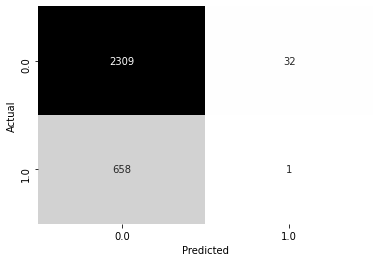

In [0]:
for j in range(100):
    # Complete the optimizer
	opt.minimize(lambda: loss_function(w1, b1, w2, b2), 
                 var_list=[w1, b1, w2, b2])

# Make predictions with model
model_predictions = model(w1, b1, w2, b2, test_features)
print(model_predictions.shape)
print(test_targets.shape)
# Construct the confusion matrix
confusion_matrix(test_targets, model_predictions)